In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

job = pd.DataFrame(data = pd.read_csv("job_postings.csv"))
job = job.drop("Unnamed: 0", axis=1)
job.tail(2)

,Category,Workplace,Location,Department,Type
1093,UI/UX,On-site,"Amsterdam, North Holland, Netherlands","Marketing, Communications and Events",Full time
1094,UI/UX,Remote,Spain,Product & Technology,Full time


In [34]:
def replace_df(dataframe, columna):
    dataframe[columna] = dataframe[columna].replace({"Hybrid":"Hybride"})
    dataframe = dataframe.dropna(subset = columna)
    return dataframe

job = replace_df(job, "Workplace")
job = replace_df(job, "Type")


print(job["Type"].unique())
print(job["Workplace"].unique())

['Full time' 'Contract' 'Other' 'Part time' 'Temporary' 'Temps plein']
['Remote' 'On-site' 'Hybride' 'Sur cite']


In [35]:
job_category = job.groupby("Category").size().reset_index(name = "Amount").sort_values(by = "Amount", ascending = False)
job_category = job_category.reset_index()
job_category.drop(columns = "index")

,Category,Amount
0,Data Scientist,161
1,UI/UX,160
2,Software Developer,158
3,HR,153
4,Business Analyst,143
5,Cloud,138


In [36]:
job_type = job.groupby(["Category", "Type"])["Type"].count().reset_index(name = "Amount")
job_type = pd.DataFrame(data = job_type)
job_type.pivot_table(index = "Category", columns = "Type", values = "Amount", fill_value= 0)

Type,Contract,Full time,Other,Part time,Temporary,Temps plein
Category,,,,,,
Business Analyst,14,126,1,2,0,0
Cloud,4,132,2,0,0,0
Data Scientist,1,154,1,1,4,0
HR,11,131,1,7,2,1
Software Developer,4,141,5,0,5,3
UI/UX,4,151,3,0,2,0


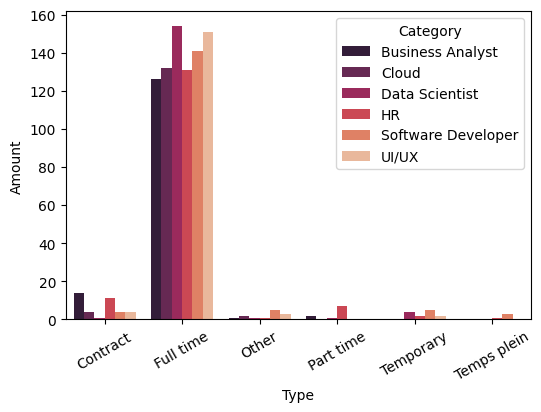

In [37]:
job_type_2 = job.groupby(["Category", "Type"])["Type"].count().reset_index(name = "Amount")
job_type_2 = pd.DataFrame(data = job_type_2)

plt.figure(figsize = (6,4))
sns.barplot(data = job_type_2, x = "Type", y = "Amount", hue = "Category", palette = "rocket")
plt.xticks(rotation = 30)
plt.show()

In [38]:
job_work = job.groupby(["Category", "Workplace"])["Workplace"].count().reset_index(name = "Amount").sort_values("Amount", ascending = False)
job_work = job_work.pivot_table(index = "Category", columns = "Workplace", values = "Amount")
job_work = job_work.fillna(0)
job_work = job_work.astype(int)
job_work

Workplace,Hybride,On-site,Remote,Sur cite
Category,,,,
Business Analyst,33,74,36,0
Cloud,31,48,59,0
Data Scientist,24,73,64,0
HR,18,84,51,0
Software Developer,17,72,66,3
UI/UX,25,44,91,0


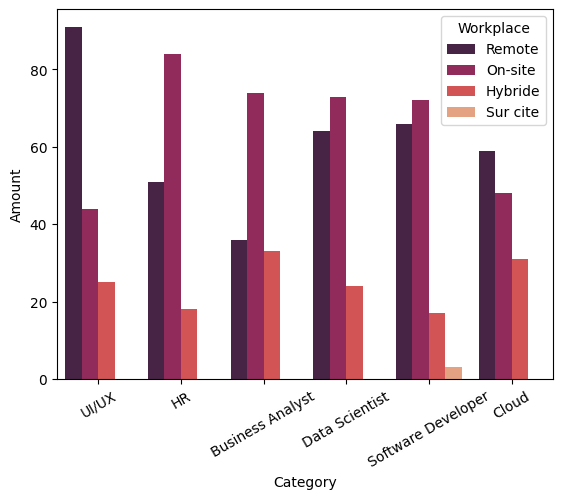

In [39]:
job_work_2 = job.groupby(["Category", "Workplace"])["Workplace"].count().reset_index(name = "Amount").sort_values("Amount", ascending = False)

sns.barplot(job_work_2, y = "Amount", x = "Category", hue = "Workplace", palette = "rocket")
plt.xticks(rotation = 30)
plt.show()

In [40]:
job_work_type = job[["Category", "Workplace", "Type"]]

from sklearn.preprocessing import OrdinalEncoder


model = OrdinalEncoder()

job_work_type[["Category", "Workplace", "Type"]] = model.fit_transform(job_work_type[["Category", "Workplace", "Type"]])
job_work_type = job_work_type.astype(int)

C:\Users\pablo\AppData\Local\Temp\ipykernel_3460\1744590541.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  job_work_type[["Category", "Workplace", "Type"]] = model.fit_transform(job_work_type[["Category", "Workplace", "Type"]])


In [41]:
#RESAMPLING

job_work_0 = job_work_type[job_work_type["Category"] == 0]
job_work_1 = job_work_type[job_work_type["Category"] == 1]
job_work_2 = job_work_type[job_work_type["Category"] == 2]
job_work_3 = job_work_type[job_work_type["Category"] == 3]
job_work_4 = job_work_type[job_work_type["Category"] == 4]
job_work_5 = job_work_type[job_work_type["Category"] == 5]


job_work_0 = job_work_0.sample(100, random_state = 103)
job_work_1 = job_work_1.sample(100, random_state = 103)
job_work_2 = job_work_2.sample(100, random_state = 103)
job_work_3 = job_work_3.sample(100, random_state = 103)
job_work_4 = job_work_4.sample(100, random_state = 103)
job_work_5 = job_work_5.sample(100, random_state = 103)


print(job_work_0.shape)
print(job_work_1.shape)
print(job_work_2.shape)
print(job_work_3.shape)
print(job_work_4.shape)
print(job_work_5.shape)

(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)
(100, 3)


In [42]:
job_reduced = pd.concat([job_work_0,job_work_1,job_work_2,job_work_3,job_work_4,job_work_5], axis = 0)
job_reduced.tail(3)

,Category,Workplace,Type
959,5,2,1
933,5,2,1
1014,5,2,1


In [43]:
y = job_reduced["Category"]
X = job_reduced.drop("Category", axis = 1)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 100)

print(X_train.shape)
print(X_test.shape)

(540, 2)
(60, 2)


In [44]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver = 'lbfgs').fit(X_train, y_train)

y_train_hat = clf.predict(X_train)
y_test_hat = clf.predict(X_test)

clf.score(X_train, y_train)

0.2351851851851852

Entrenamiento: -1.554755896189675
Prueba: -1.5339366515837098


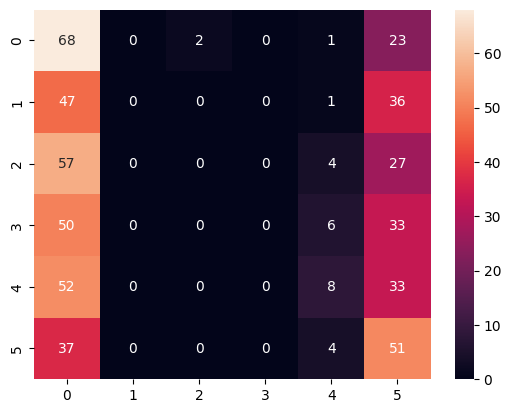

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score


conf_max = confusion_matrix(y_train, y_train_hat)

print("Entrenamiento:", r2_score(y_train, y_train_hat))
print("Prueba:", r2_score(y_test, y_test_hat))
sns.heatmap(conf_max, annot = True)
plt.show()

In [46]:
from sklearn.tree import DecisionTreeRegressor

tree_2 = DecisionTreeRegressor(max_depth = 5)

reg = tree_2.fit(X_train, y_train)

y_train_hat = reg.predict(X_train)
y_test_hat = reg.predict(X_test)

from sklearn.tree import export_graphviz

print(export_graphviz(tree_2))

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="x[0] <= 1.5\nsquared_error = 2.972\nsamples = 540\nvalue = 2.517"] ;
1 [label="x[1] <= 1.5\nsquared_error = 2.868\nsamples = 329\nvalue = 2.304"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="x[0] <= 0.5\nsquared_error = 2.857\nsamples = 311\nvalue = 2.264"] ;
1 -> 2 ;
3 [label="squared_error = 2.897\nsamples = 97\nvalue = 2.103"] ;
2 -> 3 ;
4 [label="x[1] <= 0.5\nsquared_error = 2.821\nsamples = 214\nvalue = 2.336"] ;
2 -> 4 ;
5 [label="squared_error = 4.5\nsamples = 8\nvalue = 2.0"] ;
4 -> 5 ;
6 [label="squared_error = 2.752\nsamples = 206\nvalue = 2.35"] ;
4 -> 6 ;
7 [label="x[0] <= 0.5\nsquared_error = 2.556\nsamples = 18\nvalue = 3.0"] ;
1 -> 7 ;
8 [label="squared_error = 0.0\nsamples = 2\nvalue = 0.0"] ;
7 -> 8 ;
9 [label="x[1] <= 2.5\nsquared_error = 1.609\nsamples = 16\nvalue = 3.375"] ;
7 -> 9 ;
10 [label="squared_error = 2.917\nsamples = 6\nvalue = 3.5"]

In [47]:
print("Entrenamiento:", r2_score(y_train, y_train_hat))
print("Prueba:", r2_score(y_test, y_test_hat))

Entrenamiento: 0.054587259455480486
Prueba: 0.06947322384443733
